In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("D:/sanaf/Documents/Sana_internship/Oasis/car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Data Preprocessing


In [4]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# To check if there are any outliers
# Here we conclude that we don't have any outliers.
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
90%,2017.000000,9.500000,14.790000,65000.000000,0.000000
95%,2017.000000,14.500000,22.780000,80000.000000,0.000000
99%,2017.000000,23.000000,35.960000,142000.000000,1.000000


In [8]:
#Feature Engineering
# Creating a new feature called 'Car_age', It's important to know how many years old the car is.
df['Car_age'] = 2023-df['Year']
df.drop('Year',axis=1,inplace=True)

In [9]:
df.head()

,Car_Name,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


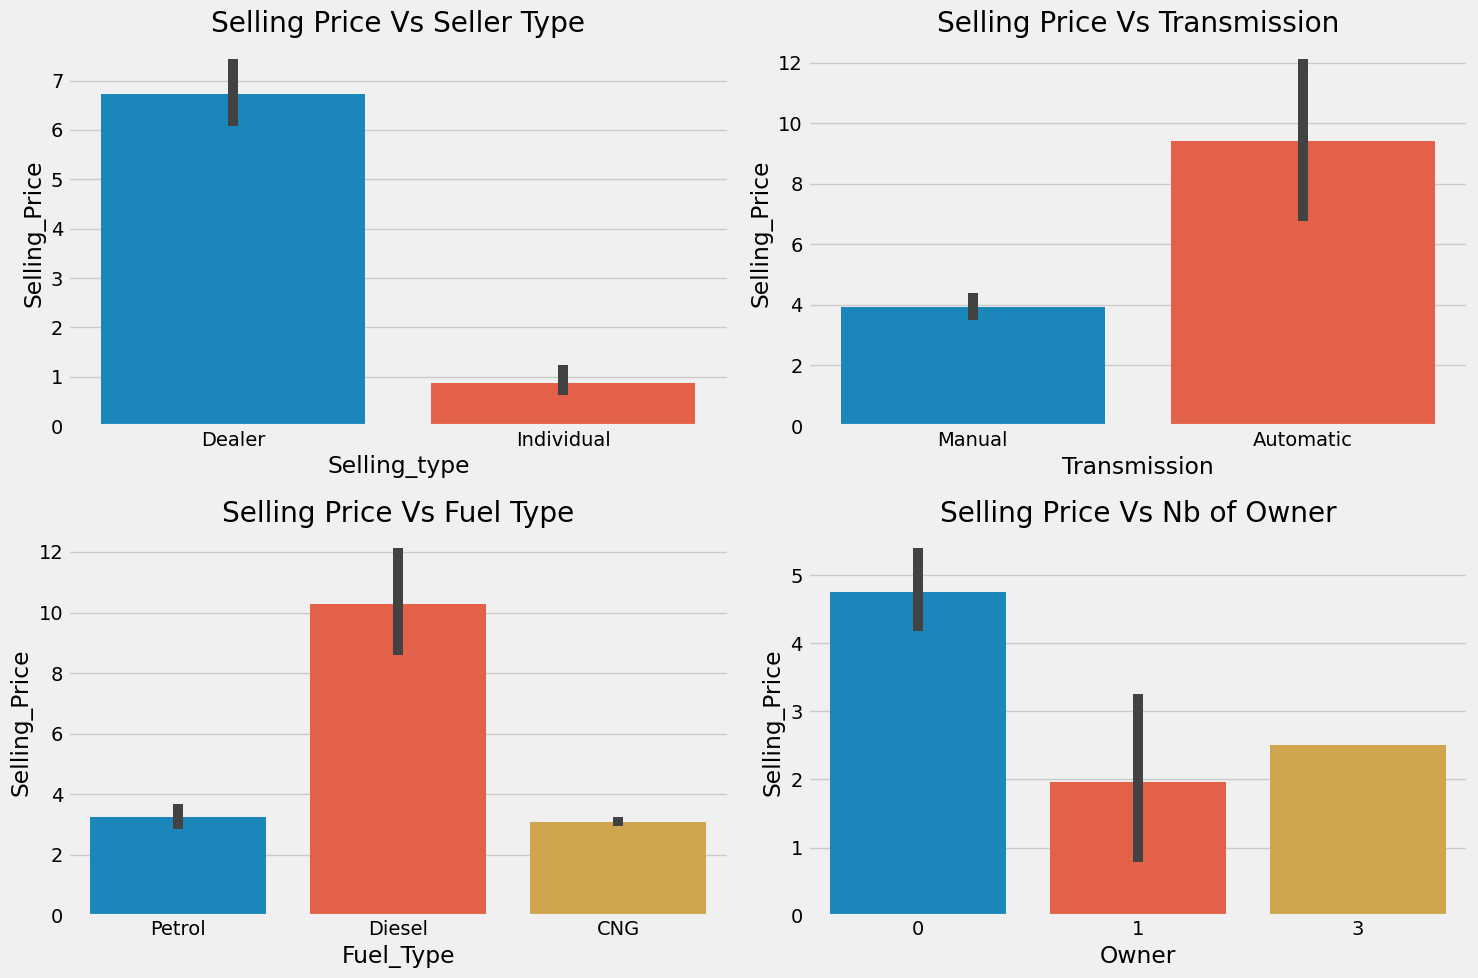

In [10]:
# Seller Type, Transmission and Fuel Type Visualization with target variable
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Selling Price Vs Car Age')

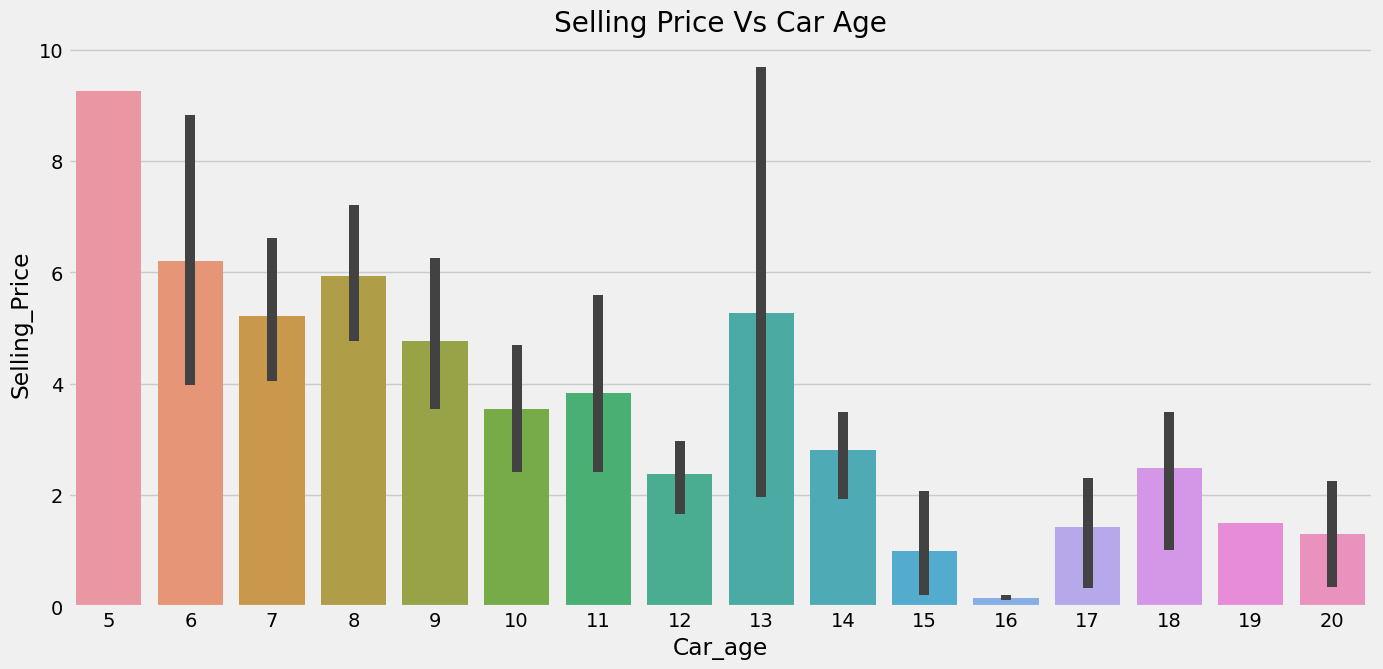

In [11]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

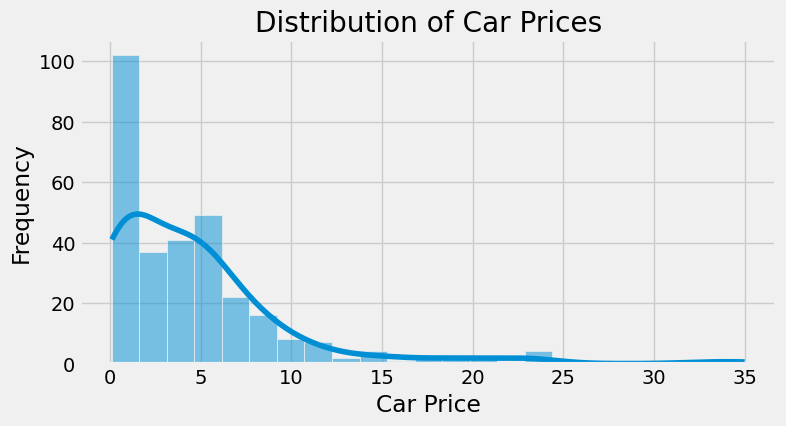

In [16]:
# Visualize the distribution of the target variable (car price)
plt.figure(figsize=(8, 4))
sns.histplot(df['Selling_Price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Car Price')
plt.ylabel('Frequency')
plt.show()

Mean Squared Error: 8.975076304465558e-24
R-squared: 1.0


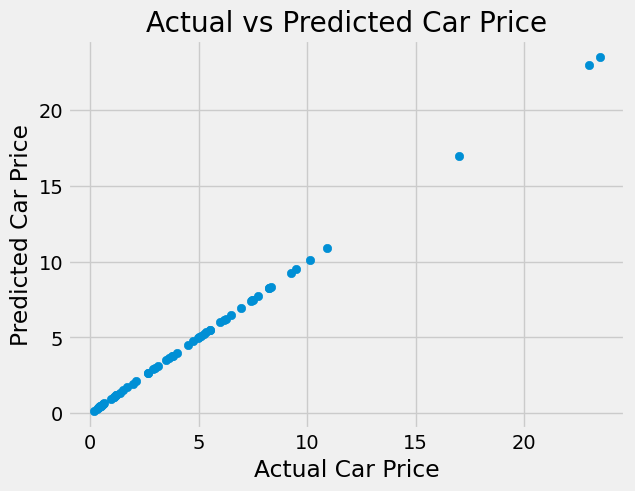

In [22]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming df is your DataFrame
# Select features (X) and target variable (y)
Y = df['Selling_Price']
X = df.drop(columns = 'Selling_Price')  

# Encode categorical columns using one-hot encoding
categorical_columns = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']
X_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Car Price')
plt.ylabel('Predicted Car Price')
plt.title('Actual vs Predicted Car Price')
plt.show()

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Root Mean Squared Error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')


Mean Absolute Error: 1.853821740924598e-12
Root Mean Squared Error: 2.995843170872861e-12
